In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from utils import palette, models_order, assignments_order

In [49]:
df = pd.read_csv('../results/simulated_data_x_results_auc.csv')
df

,Unnamed: 0,auc,prauc,model,assignment,alpha,iteration
0,0,0.866572,0.432887,BiAA,soft,0.0,0
1,1,0.866918,0.425188,SBM,soft,0.0,0
2,2,0.877100,0.428136,DBiAA,soft,0.0,0
3,3,0.873370,0.422376,DSBM,soft,0.0,0
4,4,0.866409,0.429731,BiAA,hard,0.0,0
...,...,...,...,...,...,...,...
795,795,0.576266,0.067329,DSBM,soft,1.0,24
796,796,0.579889,0.066138,BiAA,hard,1.0,24
797,797,0.555758,0.060194,SBM,hard,1.0,24
798,798,0.586350,0.071299,DBiAA,hard,1.0,24


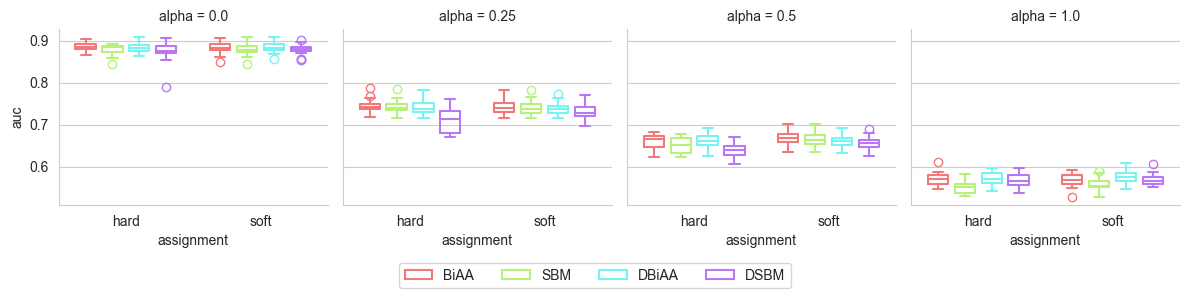

In [50]:
g = sns.FacetGrid(df, col="alpha", col_wrap=4, palette=palette, sharex=False)
g.map_dataframe(
    sns.boxplot,
    x='assignment',
    order=assignments_order,
    y='auc',
    hue='model',
    hue_order=models_order,
    palette=palette,
    dodge=True,
    fill=False,
    gap=.25
)

# get the legend
handles, labels = g.axes.flatten()[-1].get_legend_handles_labels()

g.fig.subplots_adjust(bottom=.3)

# plot the legend lower, center of the whole figure
g.fig.legend(handles, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(.5, 0))

# save figure
g.fig.savefig(f'../figures/simdata_boxplot.pdf', dpi=300)

plt.show()

In [51]:
df = pd.read_csv(f'../results/simulated_data_x_results_loss.csv')
df = df.groupby(['alpha', 'model', 'assignment', 'step']).mean().reset_index()
df.head()

,alpha,model,assignment,step,Unnamed: 0,loss,iteration
0,0.0,BiAA,hard,0,10000.0,6209.950859,12.0
1,0.0,BiAA,hard,20,10001.0,5744.428672,12.0
2,0.0,BiAA,hard,40,10002.0,5386.639531,12.0
3,0.0,BiAA,hard,60,10003.0,4997.316504,12.0
4,0.0,BiAA,hard,80,10004.0,4619.854492,12.0


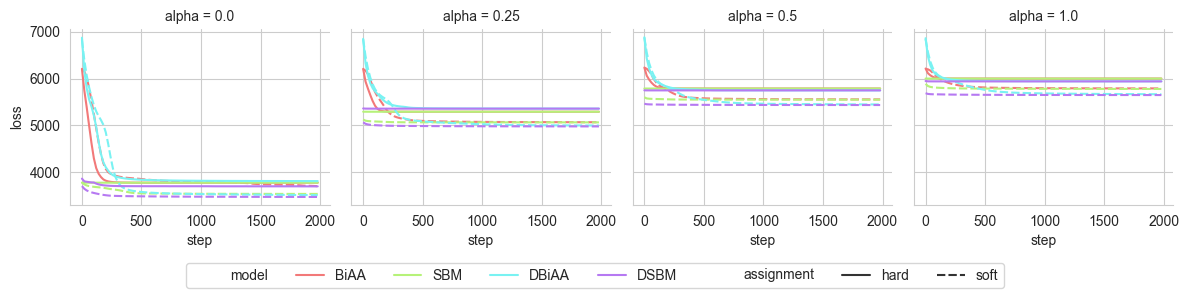

In [52]:
g = sns.FacetGrid(df, col="alpha", col_wrap=4, palette=palette, sharex=False)
g.map_dataframe(
        sns.lineplot,
            x='step',
            y='loss',
            hue='model',
            hue_order=models_order,
            style='assignment',
            palette=palette,
        )

# get the legend
handles, labels = g.axes.flatten()[-1].get_legend_handles_labels()

g.fig.subplots_adjust(bottom=.3)

# plot the legend lower, center of the whole figure
g.fig.legend(handles, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(.5, 0))

# save figure fig
g.fig.savefig(f'../figures/simdata_loss.pdf', dpi=300)

plt.show()